In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("Customer_Behaviour.csv")

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


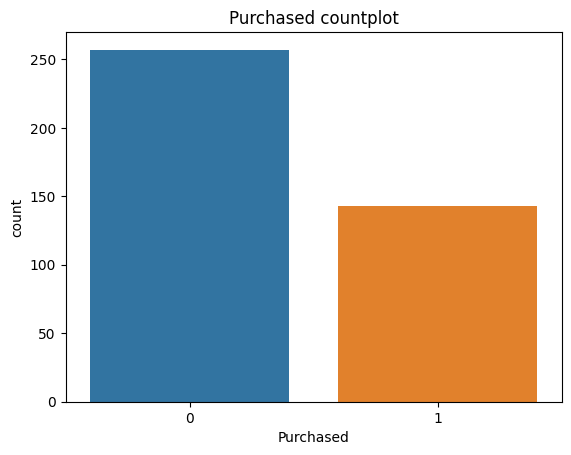

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Purchased',data=data)
plt.title('Purchased countplot')
plt.show()

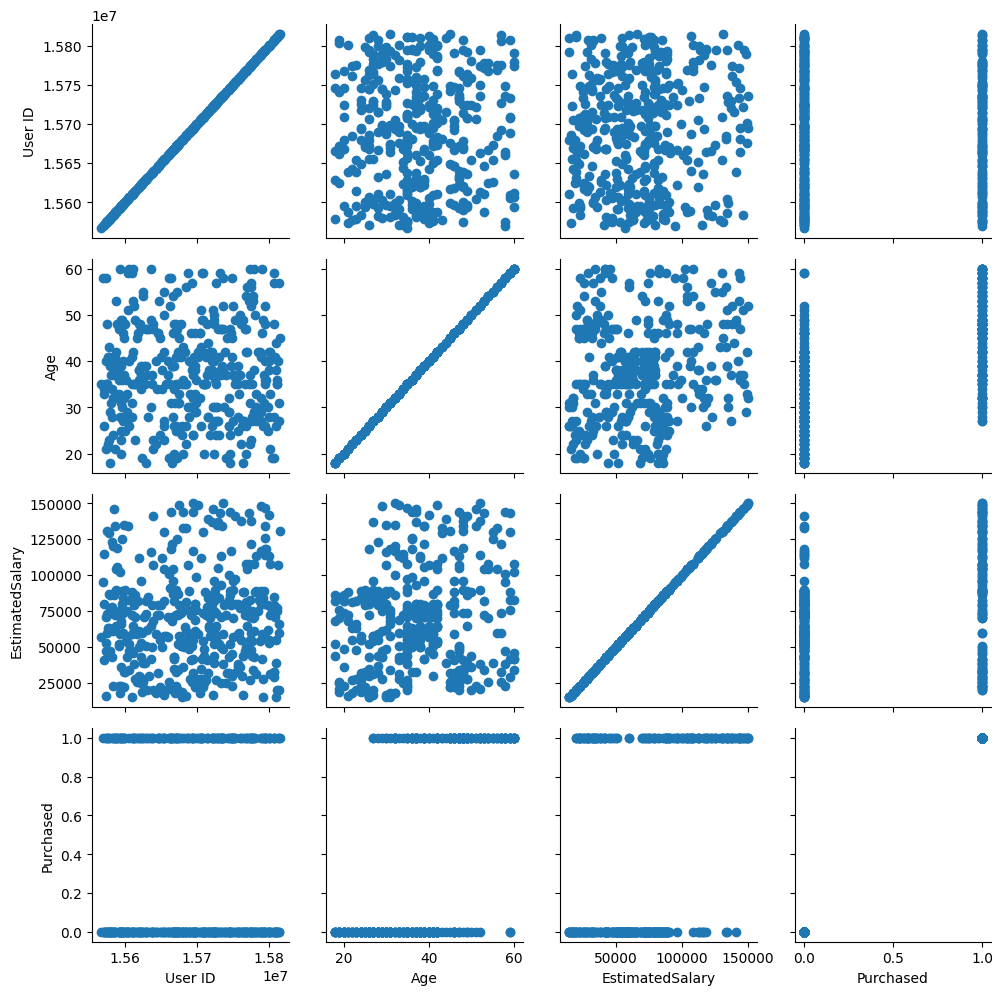

In [7]:
x=sns.PairGrid(data=data)
x.map(plt.scatter)

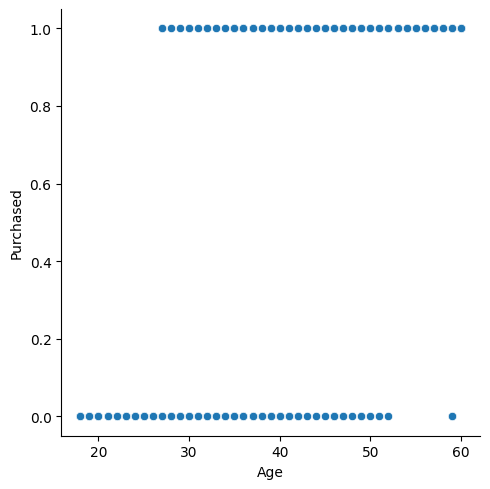

In [8]:
sns.relplot(y="Purchased",x="Age",data=data)

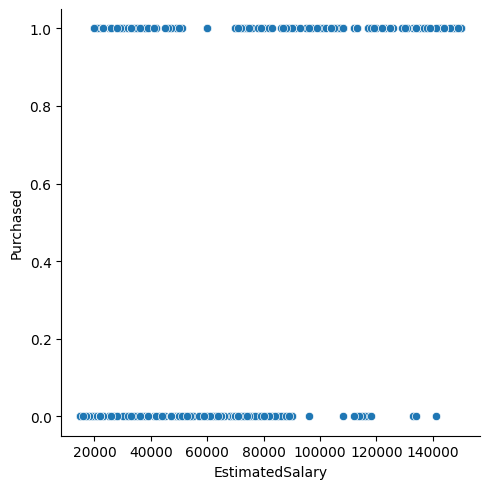

In [9]:
sns.relplot(y="Purchased",x="EstimatedSalary",data=data)

# Pre-Processing

In [10]:
df = data.copy()
# Drop User ID column
df = df.drop('User ID', axis=1)

In [11]:
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

In [12]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

NameError: name 'X_train' is not defined

In [ ]:
# Split df into X and y
y = df['Purchased']
X = df.drop('Purchased', axis=1)

# Training/Results (No Feature Engineering)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.coef_

In [ ]:
model.intercept_

In [ ]:
model.score(X_test,y_test)

In [ ]:
yp=model.predict(X_test)
yp

# Training/Results (Feature Engineering)

In [ ]:
df = data.copy()
# Drop User ID column
df = df.drop('User ID', axis=1)

In [ ]:
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

In [ ]:
# Feature engineering
income_threshold = df['EstimatedSalary'].quantile(0.95)
df['High Income'] = df['EstimatedSalary'].apply(lambda x: 1 if x >= income_threshold else 0)
old_age_threshold = df['Age'].quantile(0.75)
df['Old Age'] = df['Age'].apply(lambda x: 1 if x >= old_age_threshold else 0)
young_age_threshold = df['Age'].quantile(0.25)
df['Young Age'] = df['Age'].apply(lambda x: 1 if x <= young_age_threshold else 0)

In [ ]:
y = df['Purchased']
X = df.drop('Purchased', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [ ]:
X_train

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.coef_

In [ ]:
model.intercept_

In [ ]:
model.score(X_test,y_test)

In [ ]:
model.predict(X_test)